#**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#**Loading Dataset**

In [2]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

#**Data Cleaning & EDA**

In [3]:
# Data Cleaning & EDA
def clean_and_eda(df):
    # Check for missing values
    print("Missing values in each column:\n", df.isnull().sum())

    # Ensure 'Class' column has no NaN values
    if df['Class'].isnull().sum() > 0:
        print("\nWarning: 'Class' column contains NaN values. Filling NaN values with mode.")
        df['Class'].fillna(df['Class'].mode()[0], inplace=True)

    # Basic statistics
    print("\nBasic statistics:\n", df.describe())

    # Class distribution
    plt.figure(figsize=(6,4))
    sns.countplot(x='Class', data=df)
    plt.title('Class Distribution')
    plt.show()

    # Correlation matrix
    plt.figure(figsize=(12,8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    # Distribution of Amount feature
    plt.figure(figsize=(6,4))
    sns.histplot(df['Amount'], bins=50, kde=True )
    plt.title('Distribution of Transaction Amounts')
    plt.show()

    # Time vs Amount plot
    plt.figure(figsize=(10,6))
    plt.scatter(df['Time'], df['Amount'], alpha=0.5)
    plt.title('Time vs Amount')
    plt.xlabel('Time')
    plt.ylabel('Amount')
    plt.show()

    return df

#**Handling Missing Values**

In [4]:
# Handle Missing Values
def handle_missing_values(df):
    imputer = SimpleImputer(strategy='mean')
    df[df.columns[:-1]] = imputer.fit_transform(df[df.columns[:-1]])
    return df

#**Feature Scaling**

In [5]:
# Feature Scaling
def scale_features(df):
    scaler = StandardScaler()
    df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])
    return df

#**Handling Imbalance**

In [6]:
# Handling Imbalance
def handle_imbalance(df, method='smote'):
    X = df.drop('Class', axis=1)
    y = df['Class']

    if method == 'smote':
        sm = SMOTE(random_state=42)
        X_res, y_res = sm.fit_resample(X, y)
    elif method == 'undersample':
        rus = RandomUnderSampler(random_state=42)
        X_res, y_res = rus.fit_resample(X, y)
    elif method == 'combine':
        smote_enn = SMOTEENN(random_state=42)
        X_res, y_res = smote_enn.fit_resample(X, y)
    else:
        X_res, y_res = X, y

    return X_res, y_res

#**Baseline Model Training**

In [7]:
# Baseline Model Training
def train_baseline_models(X, y):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(),
        'XGBoost': XGBClassifier()
    }

    results = {}
    for name, model in models.items():
        skf = StratifiedKFold(n_splits=5)
        cv_results = cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
        results[name] = cv_results.mean()
        print(f'{name}: ROC-AUC = {cv_results.mean():.4f}')

    return results

#**Baseline & SMOTE Results**

Missing values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


Basic statistics:
                Time           V1           V2           V3           V4  \
count   7973.000000  7973.000000  7973.000000  7973.000000  7973.000000   
mean    4257.151261    -0.299740     0.295226     0.899355     0.215736   
std     3198.964299     1.498341     1.283914     1.090297     1.447057   
min        0.000000   -23.066842   -25.640527   -12.389545    -4.657545   
25%     1531.000000    -1.046362    -0.237359     0.372435    -0.687521   
50%     3635.000000    -0.416341     0.335446     0.948695     0.223379   
75%     6662.000000     1.122758     

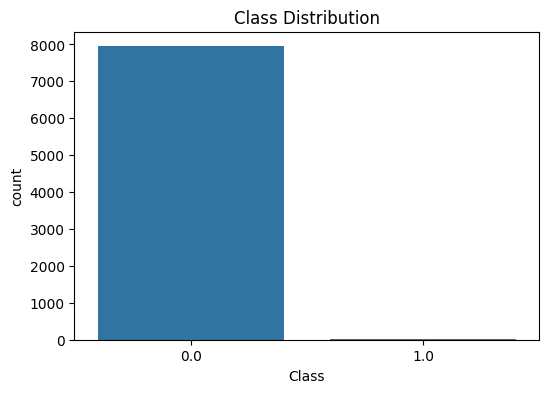

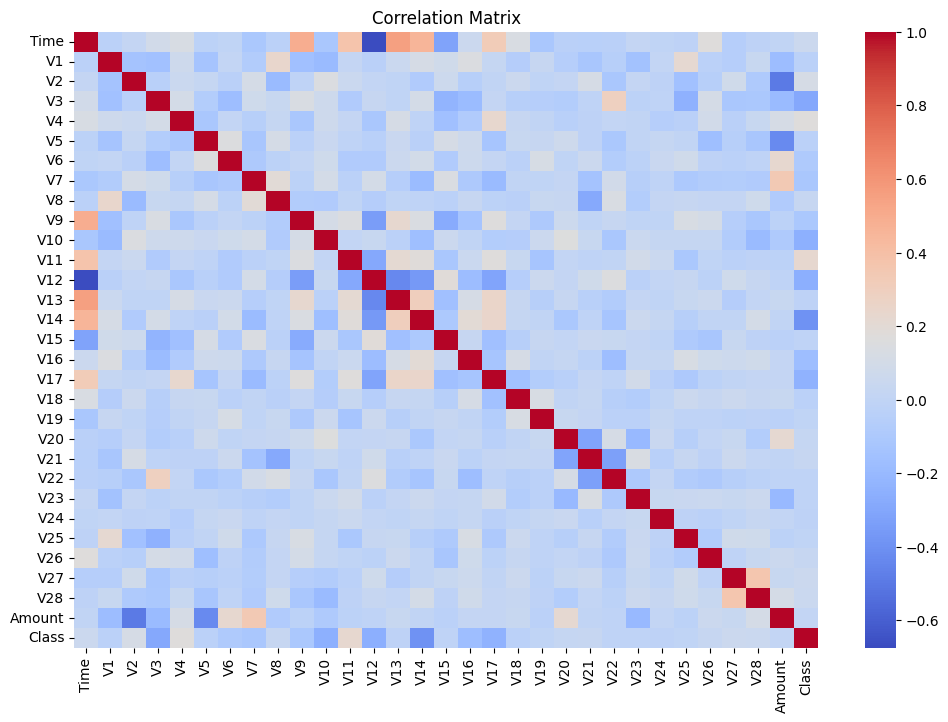

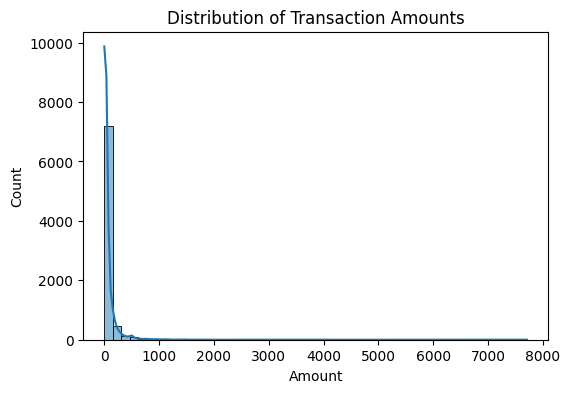

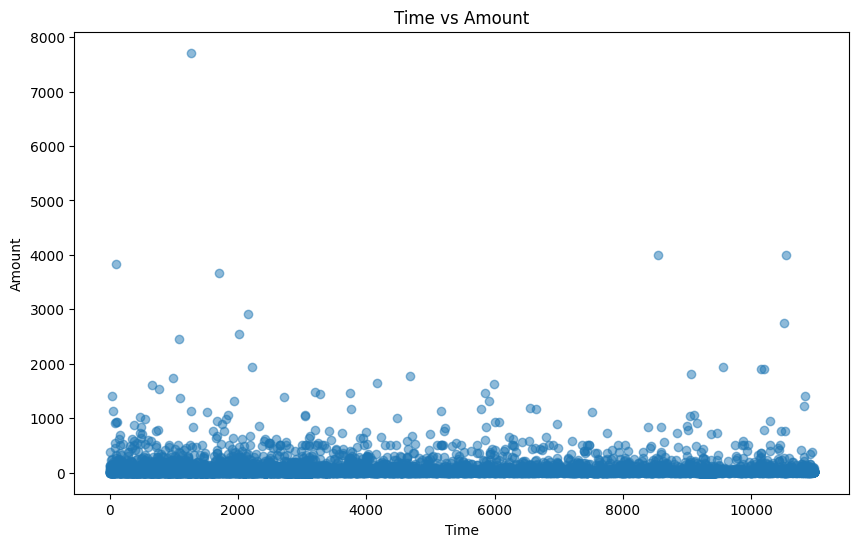


Running baseline models on imbalanced data...

Logistic Regression: ROC-AUC = 0.9839
Decision Tree: ROC-AUC = 0.9397
Random Forest: ROC-AUC = 0.9795
SVM: ROC-AUC = 0.9980
XGBoost: ROC-AUC = 0.9984

Applying SMOTE and retraining models...

Logistic Regression: ROC-AUC = 1.0000
Decision Tree: ROC-AUC = 0.9998
Random Forest: ROC-AUC = 1.0000
SVM: ROC-AUC = 1.0000
XGBoost: ROC-AUC = 1.0000

Balanced dataset saved to balanced_creditcard.csv


Baseline Results:
 {'Logistic Regression': 0.9838993552370662, 'Decision Tree': 0.9396854554306138, 'Random Forest': 0.9794968553459119, 'SVM': 0.9979874213836478, 'XGBoost': 0.9984150943396226}

SMOTE Results:
 {'Logistic Regression': 0.9999814854353616, 'Decision Tree': 0.9998112811744264, 'Random Forest': 1.0, 'SVM': 0.9999651912503461, 'XGBoost': 0.9999980221305602}


In [8]:

def full_pipeline(file_path):
    df = load_data(file_path)
    df = clean_and_eda(df)
    df = handle_missing_values(df)
    df = scale_features(df)

    print("\nRunning baseline models on imbalanced data...\n")
    X, y = df.drop('Class', axis=1), df['Class']
    baseline_results = train_baseline_models(X, y)

    print("\nApplying SMOTE and retraining models...\n")
    X_res, y_res = handle_imbalance(df, method='smote')
    smote_results = train_baseline_models(X_res, y_res)

    # Convert X_res back to DataFrame and add 'Class' column
    df_resampled = pd.DataFrame(X_res, columns=df.columns[:-1])
    df_resampled['Class'] = y_res.values

    # Save the balanced dataset to a CSV file
    balanced_file_path = 'balanced_creditcard.csv'
    df_resampled.to_csv(balanced_file_path, index=False)
    print(f"\nBalanced dataset saved to {balanced_file_path}\n")

    print("\nBaseline Results:\n", baseline_results)
    print("\nSMOTE Results:\n", smote_results)

# Path of dataset
file_path = 'creditcard.csv'
full_pipeline(file_path)